In [1]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

# Librairie `scipy`

<div class="alert alert-block alert-danger">
    Si vous utilisez ce notebook via mybinder, pensez à télécharger votre fichier à la fin de la séance afin de conserver une trace de votre travail !
</div>

## Higgs en $\gamma\gamma$

Le 4 juillet 2012, les expériences ATLAS et CMS, menées au Grand collisionneur de hadrons (LHC), ont annoncé qu’elles avaient toutes deux observé une nouvelle particule dont la masse se situait dans la région des 126 GeV. Cette particule présente des caractéristiques compatibles avec celles du boson de Higgs prédit par le Modèle standard. Le boson de Higgs, tel que le décrit ce modèle, est la manifestation la plus simple du mécanisme de Brout-Englert-Higgs qui permet, notamment, d'expliquer théoriquement la masse des particules élémentaires.

Le 8 octobre 2013, le prix Nobel de physique a été attribué conjointement à François Englert et à Peter Higgs « pour la découverte théorique d’un mécanisme contribuant à notre compréhension de l’origine de la masse des particules subatomiques, une théorie qui s’est confirmée récemment, lorsque les expériences ATLAS et CMS, menées au Grand collisionneur de hadrons du CERN, ont découvert la particule prédite. »

Pour détecter le boson de Higgs, les physiciens des expériences ATLAS et CMS étudient notamment la désintégration de cette particule en une paire de photons $\gamma$. On peut alors mesurer le nombre d'événements comprenant uniquement deux photons et le comparer à un modèle dans lequel le boson de Higgs n'existe pas. Une différence significative entre données et modèle signe alors l'existence d'une nouvelle particule.

Les données [`higgs-gg.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/higgs-gg.csv) représentent les résultats obtenus par l'expérience ATLAS au cours des années 2011/2012. Dans ce fichier, figure en première colonne l'énergie des deux photons exprimée en GeV, le nombre de paire di-photons observées en deuxième colonne et l'incertitude sur ce nombre en troisième colonne. Dans cet exercice, on cherche à reproduire la figure ci-dessous publiée dans [*Phys. Rev. Letter B716* (2012)](https://arxiv.org/abs/1207.7214) et annonçant la découverte d'une nouvelle particule.

<center><img width="50%" src="https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/figures/higgs_gg.png"/></center>

- Représenter le nombre d'événements di-photons en fonction de l'énergie. On n'oubliera pas d'intituler les axes de cette figure afin d'y faire figurer toute information pertinente.

In [2]:
import pandas as pd

data = pd.read_csv("./data/higgs-gg.csv")
data.head()

,energy,events,sigma
0,105.0,4017.0,63.379808
1,106.0,3763.0,61.343296
2,107.0,3534.0,59.447456
3,108.0,3531.0,59.422218
4,109.0,3294.0,57.393379


On représente le nombre d'événements di-photons en fonction de la masse invariante/énergie du système

Text(0.5, 0, '$m_{\\gamma\\gamma}$ [GeV]')

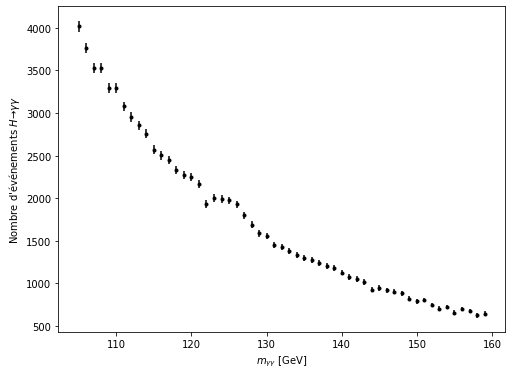

In [3]:
import matplotlib.pyplot as plt

x, y, yerr = data.energy, data.events, data.sigma
plt.errorbar(x, y, yerr=yerr, fmt=".k", label="ATLAS data")
plt.ylabel(r"Nombre d'événements $H\to\gamma\gamma$")
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")

# ou directement avec pandas.plot
#
# data.plot(x="energy", y="events", yerr="sigma", fmt=".k", label="ATLAS data").set(
#     ylabel=r"Nombre d'événements $H\to\gamma\gamma$", xlabel=r"$m_{\gamma\gamma}$ [GeV]"
# );

- Pour décrire le bruit de fond, on considère un modèle basé sur un polynome de degré 4. Ajuster ce modèle aux données étant donné les incertitudes. Calculer la valeur du $\chi^2$ où

$$
\chi^2=\sum_i\frac{\left(y_i-y_\text{modèle}(x_i)\right)^2}{\sigma_{y_i}^2}
$$
  
  et la diviser par le nombre de degrés de liberté qui correspond au nombre de points expérimentaux moins le nombre de paramètres du modèle. Pour information, une valeur de $\chi^2$/ndof voisine de 1 démontre l'adéquation statistique entre données et modèle.

On définit un modèle de bruit de fond sur la base d'une fonction polynomiale d'ordre 4.

In [4]:
import numpy as np


def model(x, *parameters):
    y = 0.0
    for i, p in enumerate(parameters):
        y += p * np.power(x, i)
    return y

On ajuste finalement les données à ce modèle étant donné les barres d'erreurs associées à l'aide de la fonction `curve_fit`

In [5]:
nparams = 5
from scipy.optimize import curve_fit

popt, pcov = curve_fit(model, x, y, sigma=yerr, p0=np.full(nparams, 1.0))
popt

array([ 1.84606718e+05, -4.89818994e+03,  5.01952231e+01, -2.32885669e-01,
        4.09908363e-04])

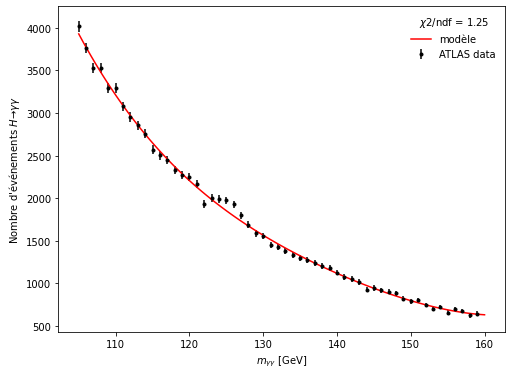

In [6]:
plt.errorbar(x, y, yerr=yerr, fmt=".k", label="ATLAS data")
xmodel = np.linspace(105, 160, 100)
plt.plot(xmodel, model(xmodel, *popt), "-r", label="modèle")
plt.ylabel(r"Nombre d'événements $H\to\gamma\gamma$")
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
chi2 = np.sum((y - model(x, *popt)) ** 2 / yerr ** 2)
plt.legend(title=r"$\chi2$/ndf = {:.2f}".format(chi2 / (len(y) - nparams)));

- Représenter dans une sous figure, la différence entre le modèle et les données puis normaliser cette différence par rapport à l'erreur sur chacun des points expérimentaux. Une découverte en physique des particules est établie lorsque le nombre d'écart-type $\sigma$ entre données expérimentales et modèle est supérieur à 5. Isoler graphiquement les points expérimentaux pour lesquels la déviation est supérieure à 3$\sigma$. Déterminer enfin la valeur maximale de cette déviation en nombre de $\sigma$ et affirmer ou non avoir découvert le boson de Higgs. Le cas échéant, donner la masse de cette particule.

Masse du boson de Higgs = 126.0 GeV
Paramètres du model de bruit de fond: [ 5.86045667e+04 -1.05618798e+03  6.54130270e+00 -1.37901205e-02]


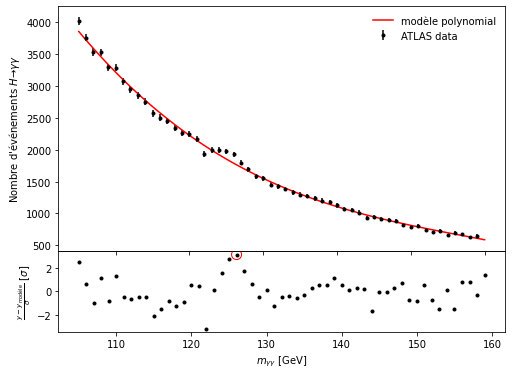

In [7]:
grid = plt.GridSpec(4, 1, hspace=0, wspace=0)

main = plt.subplot(grid[0:3], xticklabels=[])
main.errorbar(x, y, yerr=yerr, fmt=".k", label="ATLAS data")
main.set_ylabel(r"Nombre d'événements $H\to\gamma\gamma$")

popt, pcov = curve_fit(model, x, y, sigma=yerr, p0=np.full(4, 1.0))
xmodel = np.linspace(105, 160, 100)
main.plot(xmodel, model(xmodel, *popt), "-r", label="modèle polynomial")

# Plot deviation
sub = plt.subplot(grid[3])
dev = (y - model(x, *popt)) / yerr
sub.errorbar(x, dev, fmt=".k")
sub.set_ylabel(r"$\frac{y-y_\mathrm{modèle}}{\sigma}$ [$\sigma$]")
sub.set_xlabel(r"$m_{\gamma\gamma}$ [GeV]")

main.legend()

mask = dev > 3
sub.scatter(x[mask], dev[mask], edgecolors="red", c="none", s=100)

print("Masse du boson de Higgs = {} GeV".format(*x[mask].values))
print("Paramètres du model de bruit de fond: {}".format(popt))

---

## Équations de Bessel

L'équation différentielle de Bessel intervient dans nombre de problèmes physiques présentant une symétrie cylindrique parmi lesquels :

- propagation d'ondes électromagnétiques ou d'ondes acoustiques dans un guide cylindrique (*cf.* cours & TD EM L3),
- phénomènes de diffraction par une fente circulaire,
- étude de la modulation de fréquence en télécommunications,

L'équation différentielle de Bessel a pour expression

$$
\renewcommand{\d}{\text{d}}
x^2\frac{\d^2y}{\d x^2}+x\frac{\d y}{\d x}+(x^2-\alpha^2)y=0
$$

où $\alpha$ peut être un nombre réel ou complexe mais, le plus souvent, est un nombre entier naturel correspondant à l'ordre de la fonction. Les solutions de cette équation sont les fonctions de Bessel de première espèce $J_\alpha(x)$, définies en zéro et les fonctions de Bessel de seconde espèce $Y_\alpha(x)$. Dans cet exercice, nous nous intéresserons uniquement à la fonction de Bessel $J_0(x)$.

- À l'aide du module `scipy.integrate` et de sa fonction `solve_ivp`, déterminer numériquement la solution de l'équation de Bessel d'ordre 0.

In [8]:
import matplotlib.pyplot as plt
import numpy as np


def dy(x, y, nu):
    y, dydx = y[0], y[1]
    d2ydx2 = (-x * dydx - (x ** 2 - nu ** 2) * y) / x ** 2
    return dydx, d2ydx2


xmin, xmax = 1e-15, 10
x = np.arange(xmin, xmax, 0.1)
from scipy.integrate import solve_ivp

sol = solve_ivp(dy, t_span=[xmin, xmax], y0=[1, 0], t_eval=x, args=(0,))

-  Représenter cette solution ainsi que la fonction analytique de Bessel $J_0(x)$ puis, dans une sous-figure, représenter la différence entre chaque fonction

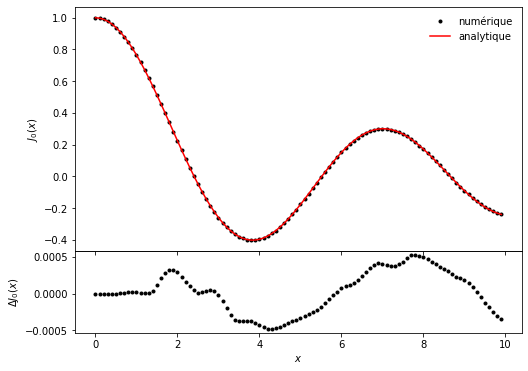

In [9]:
from scipy.special import jn, jvp

grid = plt.GridSpec(4, 1, hspace=0)
main = plt.subplot(grid[0:3], xticklabels=[])
main.plot(sol.t, sol.y[0], ".k", label="numérique")
main.plot(x, jn(0, x), "-r", label="analytique")
main.set_ylabel(r"$J_0(x)$")
main.legend()

dev = plt.subplot(grid[-1])
dev.plot(sol.t, jn(0, sol.t) - sol.y[0], ".k")
dev.set_xlabel(r"$x$")
dev.set_ylabel(r"$\Delta J_0(x)$");